# Ethekwini Electricity Usage Analysis

### Objectives
+ To visualise the trend of Ethekwini Municipality Electricity usage from 1996-2019.
+ To Develop a model to predict electricity demand based on usage and access data.


In [288]:
#Import important libriries
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from pandas import read_csv

In [289]:
cd

C:\Users\Student 95


In [290]:
df1 = pd.read_excel(r"C:\Users\Student 95\Downloads\electricity-use-ethekwini.xlsx")
df1.head()

,Year,Maximum kVA,Percent growth,Energy (kWh) sold,Percent energy growth (%),Energy (kWh) purchased,Percent growth (%),Percent loss (%),Power factor at system peak (%),Average monthly load factor (%),Number of customers
0,1978/1979,804613.0,0.042300,4.335417e+09,0.062100,4.563597e+09,0.062200,0.050000,NaN,NaN,175443
1,1979/1980,853345.0,0.060566,4.618422e+09,0.065278,4.872542e+09,0.067698,0.052153,0.916,0.7291,181261
2,1980/1981,960246.0,0.125273,5.034342e+09,0.090057,5.288290e+09,0.085325,0.048021,0.963,0.7182,198892
3,1981/1982,1075492.0,0.120017,5.624814e+09,0.117289,5.981248e+09,0.131036,0.059592,0.896,0.7300,198338
4,1982/1983,1051830.0,-0.022001,4.998457e+09,-0.111356,5.201797e+09,-0.130316,0.039090,0.930,0.7140,205961


In [409]:
# droping variable that are uneeded to the contribution of the gaol

In [291]:
df1 = df1.drop(columns=['Percent energy growth (%)','Percent growth (%)','Percent loss (%)',
                        'Power factor at system peak (%)','Average monthly load factor (%)',
                        'Percent growth','Maximum kVA','Energy (kWh) purchased','Number of customers'], axis=1)

In [292]:
df1.shape

(41, 2)

In [293]:
df1.head()

,Year,Energy (kWh) sold
0,1978/1979,4.335417e+09
1,1979/1980,4.618422e+09
2,1980/1981,5.034342e+09
3,1981/1982,5.624814e+09
4,1982/1983,4.998457e+09


In [294]:
df2 = pd.read_excel(r"C:\Users\Student 95\Downloads\electricity-customers-and-revenue.xlsx")
df2.head()

,Unnamed: 0,A: Number of business and general customers,A: Number of private residence customers,A: Number of 'other' customers,A: Number of bulk customers,A: Number of prepaid customers,A: Total number of customers,B: Business and general use,B: Private residential use,B: 'Other' use,B: Bulk use,B: Prepaid use,B: Total use,C: Business & general use growth,C: Private residential use growth,C: 'Other' use growth,C: Bulk use growth,C: Prepaid use growth,C: Unit growth,C: Total revenue: business & general,Total revenue: Private residences,C: Total revenue: other,C: Total revenue: bulk,C: Total revenue: prepayment,C: Total revenue: total,D: Cents per business and general,D: Cents per private residences,D: Cents per 'other',D: Cents per bulk,D: Cents per prepaid,D: Cents per total,E: E: Use per business and general customer,E: Use per 'other',E: Use per private and general,E: Use per bulk,E: Use per prepaid,E: Use per total,F: Rands per business and general customer,F: Rands per 'other',F: Rands per private and general,F: Rands per bulk,F: Rands per prepaid,F: Rands per total
0,1996/1997,34648,298514,1996,690,115903,451751,1.428221e+09,2.672470e+09,191879147.0,4.467819e+09,180942293.0,8.941331e+09,0.073174,0.056829,0.021361,0.053443,0.382357,0.061976,343457013.0,510441750.0,26281877.0,665704962.0,42209335.0,1.588095e+09,24.047892,19.100000,13.697099,14.900000,23.327512,17.761282,3435.072840,746.048174,8010.986431,539591.610749,130.096067,1649.384048,826.062623,142.495201,1097.272754,80399.150000,30.348175,292.951747
1,1997/1998,37816,302653,1894,669,134384,477416,1.482190e+09,2.736976e+09,204481477.0,4.574251e+09,185252692.0,9.183151e+09,0.037787,0.024137,0.065678,0.023822,0.023822,0.027045,373968739.0,568935987.0,28529103.0,716497239.0,55664362.0,1.743595e+09,25.230830,20.787028,13.951925,15.663705,30.047802,18.986896,3266.231245,753.606747,8996.897087,569787.178127,114.877696,1602.926196,824.097249,156.652444,1255.240364,89249.780643,34.518223,304.345936
2,1998/1999,40996,310811,1798,675,151221,505501,1.458813e+09,2.657073e+09,181010121.0,4.531910e+09,244605860.0,9.073413e+09,-0.015771,-0.029194,-0.114785,-0.009256,0.320390,-0.011950,408643217.0,613826976.0,30791039.0,747881450.0,71865355.0,1.873008e+09,28.012031,23.101621,17.010673,16.502565,29.380063,20.642817,2965.356905,712.403252,8389.419772,559495.117778,134.794914,1495.778924,830.656684,164.576698,1427.096728,92331.043210,39.602830,308.770909
3,1999/2000,43238,318525,1749,682,158982,523176,1.470443e+09,2.688921e+09,182979615.0,4.573100e+09,280478980.0,9.195923e+09,0.007972,0.011986,0.010881,0.009089,0.146657,0.013502,436274970.0,655686067.0,32191903.0,798197146.0,84182759.0,2.006533e+09,29.669619,24.384729,17.593164,17.454181,30.013928,21.819810,2834.010702,703.482417,8718.296884,558785.419844,147.018205,1464.759273,840.840175,171.542283,1533.824233,97531.420577,44.125938,319.607685
4,2000/2001,40576,319763,1619,754,162839,525551,1.604265e+09,2.640769e+09,197188369.0,4.668287e+09,296930339.0,9.407440e+09,0.091008,-0.017907,0.077652,0.020815,0.058655,0.023001,445179115.0,722925897.0,35205659.0,847835582.0,96138266.0,2.147285e+09,27.749717,27.375579,17.853821,18.161600,32.377381,22.825386,3294.774929,688.210045,10149.699866,515946.811340,151.954967,1491.678925,914.290703,188.401487,1812.109275,93704.197834,49.199038,340.481469


In [295]:
df2.shape

(23, 43)

In [410]:
# Renaming the variable

In [296]:
df2 = df2.rename(columns={'Unnamed: 0': 'Year'})

In [411]:
# merging Datasets

In [297]:
df = pd.merge(df1,df2, on = "Year", how = "inner")
df.head()

,Year,Energy (kWh) sold,A: Number of business and general customers,A: Number of private residence customers,A: Number of 'other' customers,A: Number of bulk customers,A: Number of prepaid customers,A: Total number of customers,B: Business and general use,B: Private residential use,B: 'Other' use,B: Bulk use,B: Prepaid use,B: Total use,C: Business & general use growth,C: Private residential use growth,C: 'Other' use growth,C: Bulk use growth,C: Prepaid use growth,C: Unit growth,C: Total revenue: business & general,Total revenue: Private residences,C: Total revenue: other,C: Total revenue: bulk,C: Total revenue: prepayment,C: Total revenue: total,D: Cents per business and general,D: Cents per private residences,D: Cents per 'other',D: Cents per bulk,D: Cents per prepaid,D: Cents per total,E: E: Use per business and general customer,E: Use per 'other',E: Use per private and general,E: Use per bulk,E: Use per prepaid,E: Use per total,F: Rands per business and general customer,F: Rands per 'other',F: Rands per private and general,F: Rands per bulk,F: Rands per prepaid,F: Rands per total
0,1996/1997,8.941331e+09,34648,298514,1996,690,115903,451751,1.428221e+09,2.672470e+09,191879147.0,4.467819e+09,180942293.0,8.941331e+09,0.073174,0.056829,0.021361,0.053443,0.382357,0.061976,343457013.0,510441750.0,26281877.0,665704962.0,42209335.0,1.588095e+09,24.047892,19.100000,13.697099,14.900000,23.327512,17.761282,3435.072840,746.048174,8010.986431,539591.610749,130.096067,1649.384048,826.062623,142.495201,1097.272754,80399.150000,30.348175,292.951747
1,1997/1998,9.183151e+09,37816,302653,1894,669,134384,477416,1.482190e+09,2.736976e+09,204481477.0,4.574251e+09,185252692.0,9.183151e+09,0.037787,0.024137,0.065678,0.023822,0.023822,0.027045,373968739.0,568935987.0,28529103.0,716497239.0,55664362.0,1.743595e+09,25.230830,20.787028,13.951925,15.663705,30.047802,18.986896,3266.231245,753.606747,8996.897087,569787.178127,114.877696,1602.926196,824.097249,156.652444,1255.240364,89249.780643,34.518223,304.345936
2,1998/1999,9.073413e+09,40996,310811,1798,675,151221,505501,1.458813e+09,2.657073e+09,181010121.0,4.531910e+09,244605860.0,9.073413e+09,-0.015771,-0.029194,-0.114785,-0.009256,0.320390,-0.011950,408643217.0,613826976.0,30791039.0,747881450.0,71865355.0,1.873008e+09,28.012031,23.101621,17.010673,16.502565,29.380063,20.642817,2965.356905,712.403252,8389.419772,559495.117778,134.794914,1495.778924,830.656684,164.576698,1427.096728,92331.043210,39.602830,308.770909
3,1999/2000,9.195923e+09,43238,318525,1749,682,158982,523176,1.470443e+09,2.688921e+09,182979615.0,4.573100e+09,280478980.0,9.195923e+09,0.007972,0.011986,0.010881,0.009089,0.146657,0.013502,436274970.0,655686067.0,32191903.0,798197146.0,84182759.0,2.006533e+09,29.669619,24.384729,17.593164,17.454181,30.013928,21.819810,2834.010702,703.482417,8718.296884,558785.419844,147.018205,1464.759273,840.840175,171.542283,1533.824233,97531.420577,44.125938,319.607685
4,2000/2001,9.407440e+09,40576,319763,1619,754,162839,525551,1.604265e+09,2.640769e+09,197188369.0,4.668287e+09,296930339.0,9.407440e+09,0.091008,-0.017907,0.077652,0.020815,0.058655,0.023001,445179115.0,722925897.0,35205659.0,847835582.0,96138266.0,2.147285e+09,27.749717,27.375579,17.853821,18.161600,32.377381,22.825386,3294.774929,688.210045,10149.699866,515946.811340,151.954967,1491.678925,914.290703,188.401487,1812.109275,93704.197834,49.199038,340.481469


In [301]:
power.columns

Index(['Year', 'Energy (kWh) sold',
       'A: Number of business and general customers',
       'A: Number of private residence customers',
       'A: Number of 'other' customers', 'A: Number of bulk customers',
       'A: Number of prepaid customers', 'A: Total number of customers',
       'B: Business and general use', 'B: Private residential use',
       'B: 'Other' use', 'B: Bulk use', 'B: Prepaid use', 'B: Total use',
       'C: Business & general use growth', 'C: Private residential use growth',
       'C: 'Other' use growth', 'C: Bulk use growth', 'C: Prepaid use growth',
       'C: Unit growth', 'C: Total revenue: business & general ',
       'Total revenue: Private residences', 'C: Total revenue: other',
       'C: Total revenue: bulk', 'C: Total revenue: prepayment',
       'C: Total revenue: total', 'D: Cents per business and general',
       'D: Cents per private residences', 'D: Cents per 'other'',
       'D: Cents per bulk', 'D: Cents per prepaid', 'D: Cents per total',


In [303]:
power = power[['A: Total number of customers', 'B: Total use','C: Total revenue: total','D: Cents per total',
               'E: Use per total','F: Rands per total','Year', 'Energy (kWh) sold']]
power.head()

,A: Total number of customers,B: Total use,C: Total revenue: total,D: Cents per total,E: Use per total,F: Rands per total,Year,Energy (kWh) sold
0,451751,8.941331e+09,1.588095e+09,17.761282,1649.384048,292.951747,1996/1997,8.941331e+09
1,477416,9.183151e+09,1.743595e+09,18.986896,1602.926196,304.345936,1997/1998,9.183151e+09
2,505501,9.073413e+09,1.873008e+09,20.642817,1495.778924,308.770909,1998/1999,9.073413e+09
3,523176,9.195923e+09,2.006533e+09,21.819810,1464.759273,319.607685,1999/2000,9.195923e+09
4,525551,9.407440e+09,2.147285e+09,22.825386,1491.678925,340.481469,2000/2001,9.407440e+09


In [304]:
columns_rearranged = ['Year', 'A: Total number of customers','C: Total revenue: total','D: Cents per total',
               'E: Use per total','F: Rands per total', 'Energy (kWh) sold']

In [412]:
# arraging the datasets

In [305]:
power = power.reindex(columns=columns_rearranged)
power.head()

,Year,A: Total number of customers,C: Total revenue: total,D: Cents per total,E: Use per total,F: Rands per total,Energy (kWh) sold
0,1996/1997,451751,1.588095e+09,17.761282,1649.384048,292.951747,8.941331e+09
1,1997/1998,477416,1.743595e+09,18.986896,1602.926196,304.345936,9.183151e+09
2,1998/1999,505501,1.873008e+09,20.642817,1495.778924,308.770909,9.073413e+09
3,1999/2000,523176,2.006533e+09,21.819810,1464.759273,319.607685,9.195923e+09
4,2000/2001,525551,2.147285e+09,22.825386,1491.678925,340.481469,9.407440e+09


In [306]:
#We understand the nature of our dataset and the type of attributes
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          23 non-null     object 
 1   A: Total number of customers  23 non-null     int64  
 2   C: Total revenue: total       23 non-null     float64
 3   D: Cents per total            23 non-null     float64
 4   E: Use per total              23 non-null     float64
 5   F: Rands per total            23 non-null     float64
 6   Energy (kWh) sold             23 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ KB


In [307]:
power.head()

,Year,A: Total number of customers,C: Total revenue: total,D: Cents per total,E: Use per total,F: Rands per total,Energy (kWh) sold
0,1996/1997,451751,1.588095e+09,17.761282,1649.384048,292.951747,8.941331e+09
1,1997/1998,477416,1.743595e+09,18.986896,1602.926196,304.345936,9.183151e+09
2,1998/1999,505501,1.873008e+09,20.642817,1495.778924,308.770909,9.073413e+09
3,1999/2000,523176,2.006533e+09,21.819810,1464.759273,319.607685,9.195923e+09
4,2000/2001,525551,2.147285e+09,22.825386,1491.678925,340.481469,9.407440e+09


In [308]:
#Data visualization libraries
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
#Check the Null values for the entire DataFrame
power.isnull().sum().sum()

0

In [310]:
power.head()

,Year,A: Total number of customers,C: Total revenue: total,D: Cents per total,E: Use per total,F: Rands per total,Energy (kWh) sold
0,1996/1997,451751,1.588095e+09,17.761282,1649.384048,292.951747,8.941331e+09
1,1997/1998,477416,1.743595e+09,18.986896,1602.926196,304.345936,9.183151e+09
2,1998/1999,505501,1.873008e+09,20.642817,1495.778924,308.770909,9.073413e+09
3,1999/2000,523176,2.006533e+09,21.819810,1464.759273,319.607685,9.195923e+09
4,2000/2001,525551,2.147285e+09,22.825386,1491.678925,340.481469,9.407440e+09


In [311]:
power.columns[power.isna().any()].tolist()

[]

In [312]:
power.head()

,Year,A: Total number of customers,C: Total revenue: total,D: Cents per total,E: Use per total,F: Rands per total,Energy (kWh) sold
0,1996/1997,451751,1.588095e+09,17.761282,1649.384048,292.951747,8.941331e+09
1,1997/1998,477416,1.743595e+09,18.986896,1602.926196,304.345936,9.183151e+09
2,1998/1999,505501,1.873008e+09,20.642817,1495.778924,308.770909,9.073413e+09
3,1999/2000,523176,2.006533e+09,21.819810,1464.759273,319.607685,9.195923e+09
4,2000/2001,525551,2.147285e+09,22.825386,1491.678925,340.481469,9.407440e+09


In [313]:
#Drop any column with NaN values
power = power.dropna(axis=1, how='all')

### EXPLORATORY DATA ANALYSIS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258F345B9C8>,
      dtype=object)

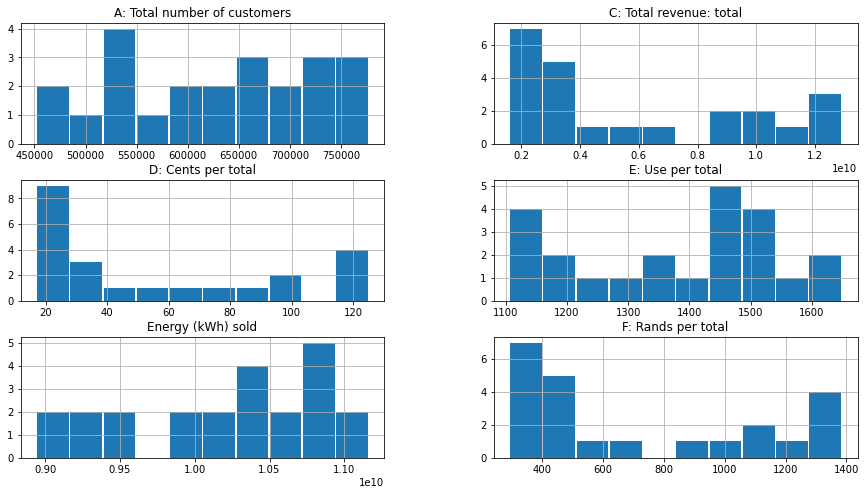

In [392]:
#We plot the histogram to check the distribution of the datasets in each attributes
power.hist(column=columns_rearranged, rwidth=0.95, figsize=(15,8))

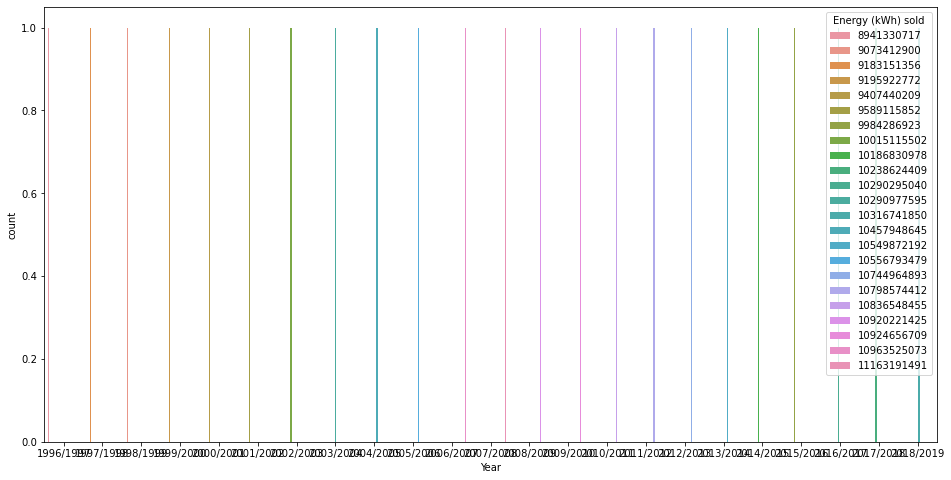

In [389]:
#We do the count plot of the Energy (kWh) sold in different years range to check if it correspond with the dataset.
from matplotlib.pyplot import figure
figure(figsize=(16,8))
sns.countplot(data=power, x='Year', hue='Energy (kWh) sold')

Text(0.5, 1.0, 'Cents Per Total')

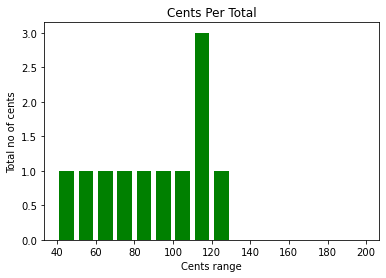

In [400]:
# Plotting the Histogram barplot to compare the frequency distribution of D: Cents per total variable.
# We also create a range to compare and analyse different distribution.

bins=[40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

plt.hist(power['D: Cents per total'], rwidth=0.75, bins=bins, color='g')
plt.xlabel('Cents range')
plt.ylabel('Total no of cents')
plt.title('Cents Per Total')

#### Feature-Feature Relationships
+ We explore the relationship between the attributes.

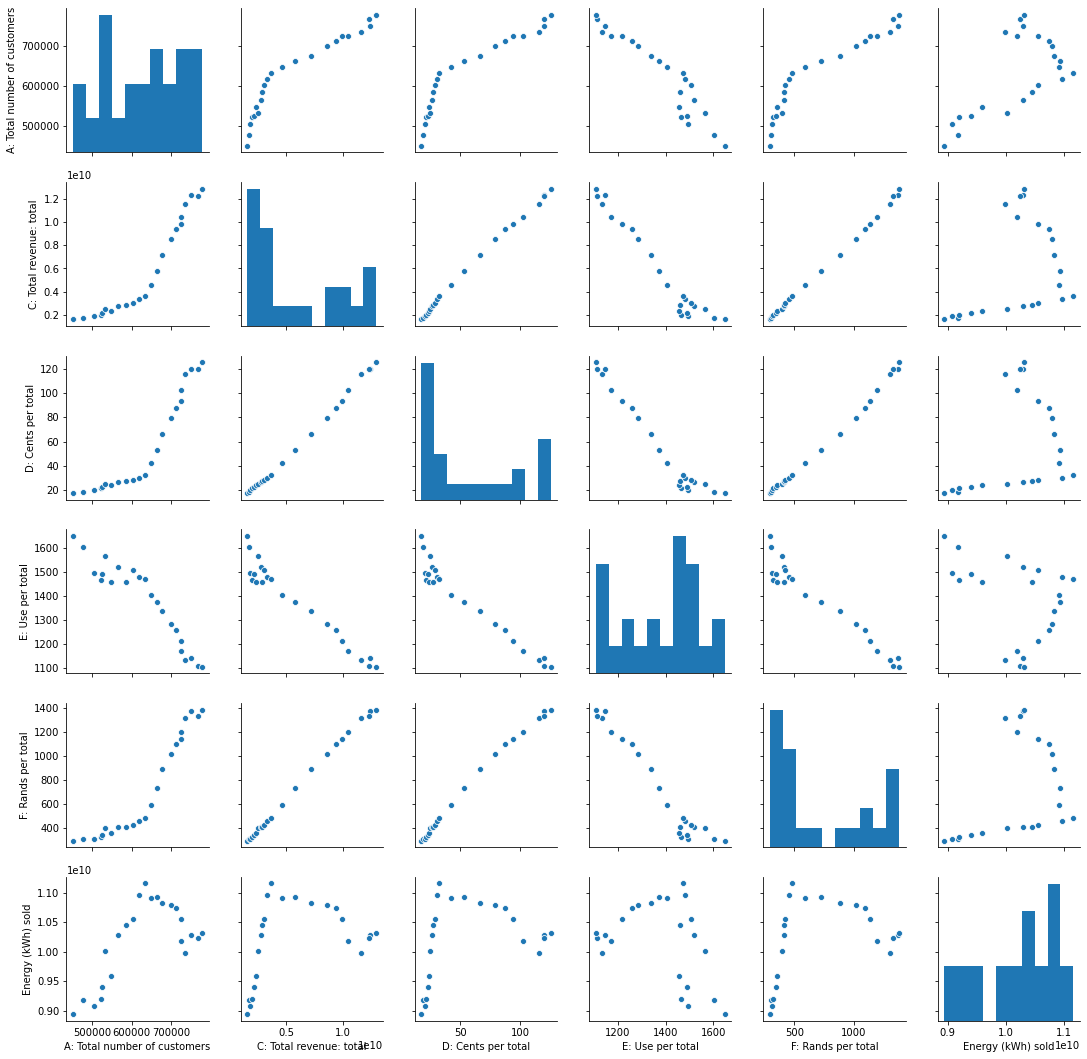

In [314]:
# The scatter charts between the pair of variables to understand the relationship.
sns.pairplot(power)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258EE067FC8>,
      dtype=object)

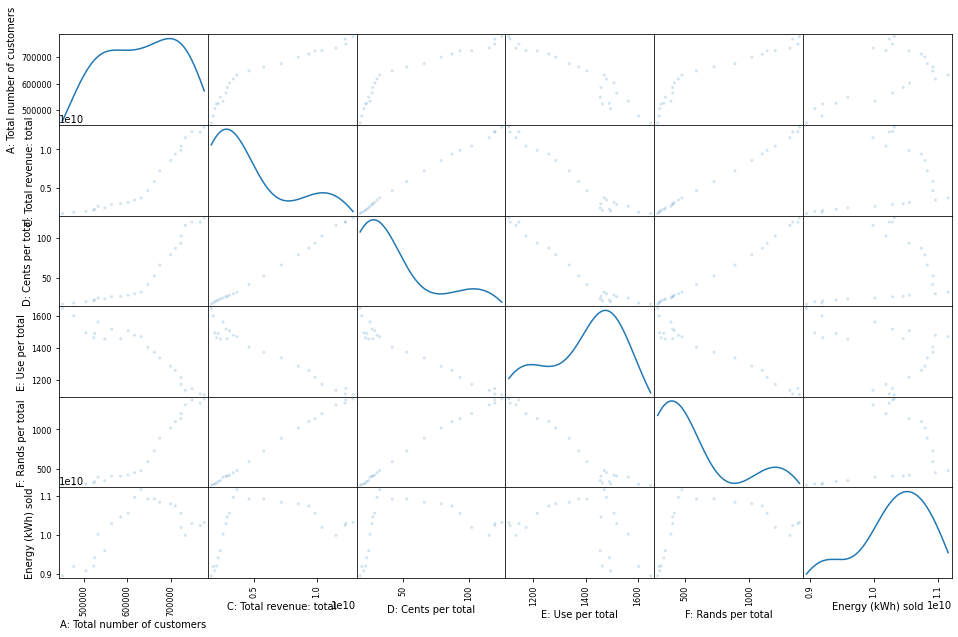

In [316]:
from pandas.plotting import scatter_matrix
scatter_matrix(power, alpha=0.2, figsize=(16, 10), diagonal='kde')

## Correlation Analysis and Feature Selection

In [ ]:
power=power.astype('int64', )

In [324]:
power.columns

Index(['Year', 'A: Total number of customers', 'C: Total revenue: total',
       'D: Cents per total', 'E: Use per total', 'F: Rands per total',
       'Energy (kWh) sold'],
      dtype='object')

In [326]:
power['C: Total revenue: total'] = power ['C: Total revenue: total'].astype('int64')

In [328]:
power['D: Cents per total'] = power ['D: Cents per total'].astype('int64')

In [329]:
power['E: Use per total'] = power ['E: Use per total'].astype('int64')

In [330]:
power['F: Rands per total'] = power ['F: Rands per total'].astype('int64')

In [331]:
power['Energy (kWh) sold'] = power ['Energy (kWh) sold'].astype('int64')

In [332]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          23 non-null     object
 1   A: Total number of customers  23 non-null     int64 
 2   C: Total revenue: total       23 non-null     int64 
 3   D: Cents per total            23 non-null     int64 
 4   E: Use per total              23 non-null     int64 
 5   F: Rands per total            23 non-null     int64 
 6   Energy (kWh) sold             23 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.1+ KB


In [333]:
#Important libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = power.iloc[:,1:6]
y = power.iloc[:,-1]

In [334]:
#Apply SeleckKBest class to extarct top 6 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [335]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [336]:
#Concat two DataFrames for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['col','Score']

In [337]:
featureScores

,col,Score
0,A: Total number of customers,3.411918e+05
1,C: Total revenue: total,6.253087e+10
2,D: Cents per total,6.043693e+02
3,E: Use per total,4.472764e+02
4,F: Rands per total,5.227427e+03


In [338]:
# Print the 6 best features
print(featureScores.nlargest(4,'Score'))

                            col         Score
1       C: Total revenue: total  6.253087e+10
0  A: Total number of customers  3.411918e+05
4            F: Rands per total  5.227427e+03
2            D: Cents per total  6.043693e+02


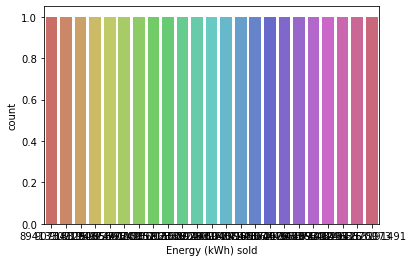

<Figure size 432x288 with 0 Axes>

In [340]:
sns.countplot(data=power, x='Energy (kWh) sold', palette='hls')
plt.show()
plt.savefig('count_plot')

#### Correlation Matrix with Heatmap

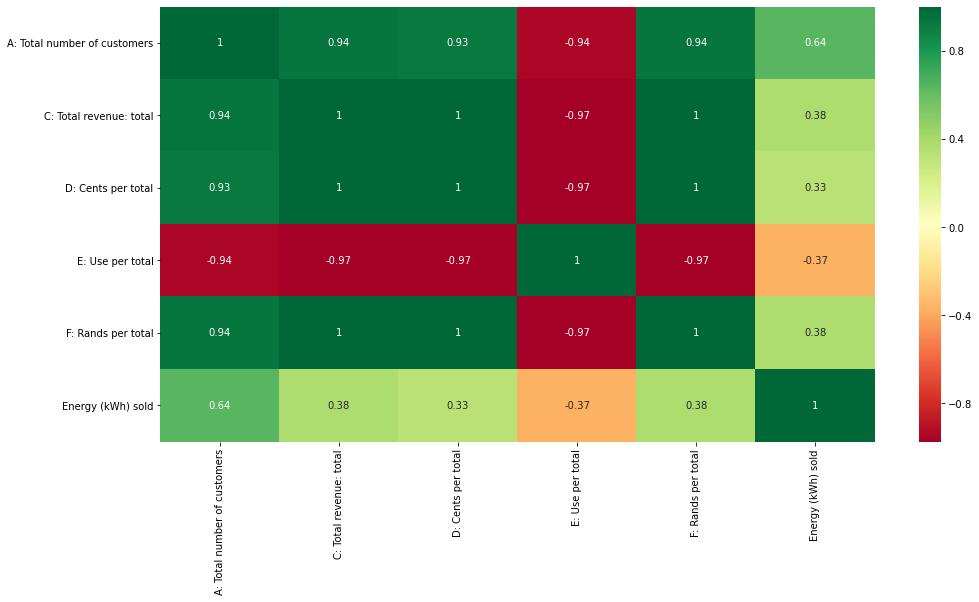

In [339]:
#The correlation of each feauture in the dataset
corrmat = power.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,8))
#We plot the heatmap
sns.heatmap(power[top_corr_features].corr(), annot=True, cmap='RdYlGn')

## BUILDING  AND DEPLOYING MODELS

#### Split the dataset
To understand the model perfomance we split the datasets into training set and test set.

In [342]:
# Split X and y into training and testing set.
from sklearn.model_selection import train_test_split

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

The 75% of the data will be used for model training and 25% for model testing.

In [355]:
# import the class
from sklearn.linear_model import LogisticRegression

In [356]:
#instantiate the model
logreg = LogisticRegression()

#fit the model with train data
logreg.fit(X_train, y_train)

#fit the model with predictor test data(X_test)
y_pred = logreg.predict(X_test)

C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [357]:
y_pred

array([10556793479, 10556793479, 10316741850, 10549872192, 10316741850,
       10556793479], dtype=int64)

In [358]:
# import the metrics
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [348]:
# Import the libraries (pipeline and models)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [344]:
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [345]:
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

In [346]:
pipeline_knn=Pipeline([('kn_classifier',KNeighborsClassifier())])

In [349]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression())])

In [350]:
#Make the list of pipelines
pipelines = [pipeline_dt,pipeline_rf,pipeline_knn,pipeline_lr]

In [351]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [352]:
#Dictionery of pipelines and classifier type for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest', 2: 'KNeighbors', 3:'Logistic Regression'}

#Fit the pipilines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [353]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Decision Tree Test Accuracy: 0.0
RandomForest Test Accuracy: 0.0
KNeighbors Test Accuracy: 0.0
Logistic Regression Test Accuracy: 0.0


In [354]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier])) 

Classifier with best accuracy:Decision Tree


### The Predicted Results for each Agorithm

#### Decision Tree Predicted Results

In [359]:
y_pred_0 = pipeline_dt.predict(X_test)

In [360]:
y_pred_0

array([10920221425, 10556793479, 10316741850, 10798574412,  9984286923,
        8941330717], dtype=int64)

#### Random Forest Predicted Results

In [364]:
y_pred_1 = pipeline_rf.predict(X_test)

In [365]:
y_pred_1

array([10556793479, 10556793479, 10316741850, 10798574412,  9984286923,
        9073412900], dtype=int64)

#### KNeighborsClassifier Predicted Results

In [362]:
y_pred_3 = pipeline_knn.predict(X_test)

In [363]:
y_pred_3

array([10015115502,  9589115852,  9984286923, 10549872192,  9984286923,
        8941330717], dtype=int64)

#### LogisticRegression Predicted Results

In [366]:
y_pred_4=pipeline_lr.predict(X_test)

In [367]:
y_pred_4

array([10556793479, 10556793479, 10316741850, 10549872192, 10316741850,
       10556793479], dtype=int64)

### Testing the Model Performance of the Decision Tree

In [401]:
# Use the forest's predict method on the test data
predictions = pipeline_dt.predict(X_test)

In [402]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [404]:
import numpy as np 

In [405]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 218936983.33 degrees.


In [406]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [407]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

In [408]:
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.9 %.


#Our model has learned to predict using the train and test dataset with an accuracy of 97.9%

# Ensemble Learning (The performance of boosting models)

Ensemble techniques combine individual models together to improve the stabilty and predictive power of the model.
One of the ensemble methods are Boosting and Gradient Boosting model.

Boosting technique reduce bias by adding all the weak learners sequantially, each classifier trying to correct its predecessor.

Gradient Boosting minimizes the loss function(MSE)of a models by adding weak learners using a gradient descesnt procedure.

#### Building Models
+ Gradient BoostingRegressor
+ XGBoost

In [371]:
#From sklearn we load Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [372]:
%%time
GB_regressor = GradientBoostingRegressor()
GB_regressor.fit(X_train,y_train)

Wall time: 979 ms


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [373]:
y_predictions = GB_regressor.predict(X_train)

In [374]:
y_predictions

array([1.09243165e+10, 1.03166666e+10, 1.07449554e+10, 1.04578736e+10,
       1.00151281e+10, 1.05500777e+10, 9.40746125e+09, 9.07346045e+09,
       9.58914860e+09, 1.01866094e+10, 1.05568265e+10, 1.02909703e+10,
       9.98454103e+09, 9.19595606e+09, 8.94142452e+09, 1.07985687e+10,
       1.09202224e+10])

In [376]:
from sklearn.metrics import r2_score, mean_squared_error

In [377]:
print('Score of Model:', r2_score(y_train,y_predictions))
print('Mean square error:', mean_squared_error(y_train, y_predictions))

Score of Model: 0.9999999565419011
Mean square error: 17531906976.256783


Test predictions

In [378]:
y_predictions = GB_regressor.predict(X_test)

In [379]:
y_predictions

array([1.06384553e+10, 1.05568265e+10, 1.01587532e+10, 1.08454812e+10,
       1.01297198e+10, 9.00367055e+09])

In [380]:
print('Score of Model:', r2_score(y_test,y_predictions))
print('Mean square error:', mean_squared_error(y_test,y_predictions))

Score of Model: 0.8054464056490706
Mean square error: 8.420147351667512e+16


#This is pretty! good our model is doing well with the train dataset prediction of 97% accuracy.

#### XGBoost Modelling

In [381]:
from xgboost import XGBRegressor

In [382]:
%%time
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

[06:17:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 945 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [383]:
y_prediction2 = xgb_regressor.predict(X_train)

In [384]:
y_prediction2

array([1.0905737e+10, 1.0301462e+10, 1.0744779e+10, 1.0457126e+10,
       1.0014820e+10, 1.0553123e+10, 9.4075187e+09, 9.0740449e+09,
       9.5885169e+09, 1.0187480e+10, 1.0556584e+10, 1.0285872e+10,
       1.0001074e+10, 9.1964006e+09, 8.9443379e+09, 1.0800726e+10,
       1.0905737e+10], dtype=float32)

In [385]:
print('Score of Model :', r2_score(y_train,y_prediction2))
print('Mean square error :', mean_squared_error(y_train,y_prediction2))

Score of Model : 0.9998344158292763
Mean square error : 66800121295946.65


Test predictions

In [386]:
y_prediction3 = xgb_regressor.predict(X_test)

In [387]:
y_prediction3

array([1.0905737e+10, 1.0556584e+10, 1.0301462e+10, 1.0905737e+10,
       1.0001074e+10, 8.9443379e+09], dtype=float32)

In [388]:
print('Score of Model :', r2_score(y_test,y_prediction3))
print('Mean square error :', mean_squared_error(y_test,y_prediction3))

Score of Model : 0.8531631506644078
Mean square error : 6.354999054040252e+16


#### Observations
+ As we apply above the ensemble models we come to observe the performance of these model in productionization
  Gradient Boost is the best model with 99% accuracy compared to Xtreme Gradient Boost with 85% accuracy.
+ We also note that Gradient Boost is the slowest model with 979 ms compared to Xtreme GB which ran 945 ms.
+ We can improve our ensembe learning models by doing more feature engineering:
    + Removing outliers
    + Dropping columns with low variance of about 0.01 threshold value
    + Checking some correlation of the indexes and remove those columns with same correlation as it denotes duplicates
    + Implementing the models using hyperparameter tuning.